<font size=5  color=#003366> [LGBIO2020] - Bioinstrumentation <br><br> 
Practical session 03 - Classification  </font> <br><br><br>

<font size=5  color=#003366>
Prof. M. Verleysen<br>
Prof. A. Moureaux<br>

<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
<div style="text-align: right"> Version 2021 </div>
<br><br>
</font>

<font size=5 color=#009999> <b>1. Context </b> </font> <br> <br>
 
In this exercise session, we will build supervised classifiers aiming to help breast cancer diagnosis using measurements made on the breast cells of patients. The available dataset includes n = 569 patients suffering from a breast tumor. Among these tumors, 357 are benign and 212 are malignant. 
A benign tumor is a mild tumor, i.e. a tumor that cannot lead to metastasis and is not dangerous for the patient’s health. Nevertheless, such a tumor can evolve to a malignant tumor which can be fatal if not treated on time. A malignant tumor is hence, in contrast, a serious tumor which can lead to life-threatening metastasis. From the time the tumor is detected, it is therefore crucial to distinguish whether it is a malignant or a benign tumor in order to treat it on time. <br>

The goal of this exercise session is to build a classifier aiming to aid this diagnosis. To this aim, the data we have about the patients are statistics computed from measurements taken on the nucleus of several breast cells in our 569 patients:

<table style="width:45%">
            <thead>
                <tr>
                    <th style="width:20%"> Measurement </th>
                    <th> Name </th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td> 1 </td>
                    <td> radius (mean of distances from center to points on the perimeter) </td>
                </tr>
                <tr>
                    <td> 2 </td>
                    <td> texture (standard deviation of gray-scale values) </td>
                </tr>
                <tr>
                    <td> 3 </td>
                    <td> perimeter </td>
                </tr>
                <tr>
                    <td> 4 </td>
                    <td> area </td>
                </tr>
                <tr>
                    <td> 5 </td>
                    <td> smoothness (local variation in radius lengths) </td>
                </tr>
                <tr>
                    <td> 6 </td>
                    <td> compactness (perimeter²/ area - 1.0) </td>
                </tr>
                <tr>
                    <td> 7 </td>
                    <td> concavity (severity of concave portions of the contour) </td>
                </tr>
                <tr>
                    <td> 8 </td>
                    <td> concave points (number of concave portions of the contour) </td>
                </tr>
                <tr>
                    <td> 9 </td>
                    <td> symmetry </td>
                </tr>
                <tr>
                    <td> 10 </td>
                    <td> fractal dimension (coastline approximation - 1) </td>
                </tr>
            </tbody>
    </table>      
<br>

For each measurement, we have the mean, the standard deviation and the largest value. We hence have a total of $p = 30$ variables in our dataset. The <samp>breastCancer_data.csv</samp> file contains these data and the class variable is available in two formats: binary format (<samp>in breastCancer_target_bin.csv</samp>) and cell format (in <samp>breastCancer_target_cell.csv</samp>). So in this dataset, the first variable is the mean radius, the $11^\text{th}$ is the standard deviation of the radius and the $21^\text{st}$ is the largest radius. <br>

Import data and observe the feature values. Are they in the same range? Are some features more discriminative than others? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------------------------------------
# Import data into panda data frames
# ------------------------------------------------------------------------------------------

target_bin  = pd.read_csv('Data/breastCancer_target_bin.csv',header=None)
target_cell = pd.read_csv('Data/breastCancer_target_cell.csv',header=None)
data        = pd.read_csv('Data/breastCancer_data.csv',header=None)

# useful commands to have a first look at the data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

# ------------------------------------------------------------------------------------------
# Analysis of the correlation between variables 
# ------------------------------------------------------------------------------------------

X         = [label for label in data]
N         = data.shape[1]
corr      = (data.corr()).values

# Display the correlation in cells
hovertext = [[f'corr({X[i]}, {X[j]})= {corr[i][j]:.2f}' for j in range(N)] for i in range(N)]

sns_colorscale = [[0.0, '#3f7f93'], 
 [0.071, '#5890a1'],
 [0.143, '#72a1b0'],
 [0.214, '#8cb3bf'],
 [0.286, '#a7c5cf'],
 [0.357, '#c0d6dd'],
 [0.429, '#dae8ec'],
 [0.5, '#f2f2f2'],
 [0.571, '#f7d7d9'],
 [0.643, '#f2bcc0'],
 [0.714, '#eda3a9'],
 [0.786, '#e8888f'],
 [0.857, '#e36e76'],
 [0.929, '#de535e'],
 [1.0, '#d93a46']]

heat = go.Heatmap(z=data.corr(),
                  x=X,
                  y=X,
                  zmin=-1,
                  zmax=1,
                  xgap=1, ygap=1,
                  colorscale=sns_colorscale,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext=hovertext,
                  hoverinfo='text')

title = 'Correlation Matrix'               
layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)  
fig.show() 

In [3]:
import plotly.express as px 
from sklearn import preprocessing

# ------------------------------------------------------------------------------------------
# Box plot of the features depending on the target 
# ------------------------------------------------------------------------------------------

dataWithTarget           = pd.read_csv('Data/breastCancer_data.csv',header=None)
dataWithTarget["target"] = target_cell.values

# Normalize the data
min_max_scaler                 = preprocessing.MinMaxScaler()
x_scaled                       = min_max_scaler.fit_transform(data.values)
dataScaledWithTarget           = pd.DataFrame(x_scaled)
dataScaledWithTarget["target"] = target_cell.values

print('------------------ FEATURES 0 to 10 : MEAN ------------------')
print('___Without Normalization___ ')
fig = px.box(dataWithTarget, y = list(range(10)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()
print('___With Normalization___ ')
fig = px.box(dataScaledWithTarget, y = list(range(10)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()

print('------------------ FEATURES 10 to 20 : STANDARD DEVIATION ------------------')
print('___Without Normalization___ ')
fig = px.box(dataWithTarget, y = list(range(10,20)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()
print('___With Normalization___ ')
fig = px.box(dataScaledWithTarget, y = list(range(10,20)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()

print('------------------ FEATURES 20 to 30 : MAX VALUE ------------------')
print('___Without Normalization___ ')
fig = px.box(dataWithTarget, y = list(range(20,30)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()
print('___With Normalization___ ')
fig = px.box(dataScaledWithTarget, y = list(range(20,30)), color = "target", points="all") 
fig.update_traces(quartilemethod="inclusive") 
fig.show()

------------------ FEATURES 0 to 10 : MEAN ------------------
___Without Normalization___ 


___With Normalization___ 


------------------ FEATURES 10 to 20 : STANDARD DEVIATION ------------------
___Without Normalization___ 


___With Normalization___ 


------------------ FEATURES 20 to 30 : MAX VALUE ------------------
___Without Normalization___ 


___With Normalization___ 


<font size=5 color=#009999> <b>2. Feature Selection/ Feature Extraction </b> </font> <br> <br>

Unlike explicit programming, machine learning is a form of AI that enables a system to learn from directly from data. Modern day datasets are very rich in information with data collected from millions of IoT devices and sensors. This makes the data high dimensional and it is quite common to see datasets with hundreds of features. <br>

Feature Selection/Extraction is a very critical component in a Data Scientist’s workflow. When presented data with very high dimensionality, models usually choke because:
   - Training time increases exponentially with number of features. Ressources need also to be allocated for uninformative features. 
   - Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly.
    
**Feature selection** is "the process of selecting subset of relevant features for processing, without any transformation". Such methods consider the relationship between features and the target variable to compute the importance of features. We will quantify this relation by the use of the correlation between each variable and the target variable.

**Feature extraction** "aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features)". These new reduced set of features should then be able to summarize most of the information contained in the original set of features. A classical way to perform feature selection is to use one dimensionality reduction tools such as the principal component analysis (PCA).

<img src="imgs/dimensionality_reduction.jpg" width = "250">

    
You are asked to implement both feature selection and feature extraction. 

<div class="alert alert-info">
<b>Usefull Methods</b>  <br>
<ol>
     <li>For the correlation method, use the <samp>corrcoef</samp> function from the <samp>numpy</samp> module to measure the linear correlation between all the variables and the target.
     <li>For PCA method, choose the number of components to keep based on the percentage of explained variance. Use the functions in the <samp>sklearn</samp> module for this method.
</ol>
</div>

   

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#explained ratio can be a good way to compare PCA

# -------------------------------------------------------------------------------------
# 1. Feature Selection based on Correlation 
# -------------------------------------------------------------------------------------
datawithtargetbis = data.copy()
datawithtargetbis["target"] = target_bin
#print(datawithtargetbis.corr())
print(np.corrcoef(datawithtargetbis.values,rowvar=False)[-1])
# -------------------------------------------------------------------------------------
# 2. Feature Extraction based on PCA (do not forget to normalize your data before PCA)
# -------------------------------------------------------------------------------------
scaler = StandardScaler()
data_norm = scaler.fit_transform(data.values)
#print(data_norm)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_norm)

dataframe_norm = pd.DataFrame(data = pca_data, columns= ["pca1","pca2","pca3"])
dataframe_norm['target'] = target_bin[0]
print(dataframe_norm)
fig = px.scatter_3d(dataframe_norm,x='pca1',y='pca2',z='pca3',color ='target')
fig.show()

[ 0.73002851  0.4151853   0.74263553  0.70898384  0.35855997  0.59653368
  0.69635971  0.77661384  0.33049855 -0.0128376   0.56713382 -0.00830333
  0.5561407   0.54823594 -0.06701601  0.29299924  0.25372977  0.40804233
 -0.00652176  0.07797242  0.77645378  0.45690282  0.78291414  0.73382503
  0.42146486  0.59099824  0.65961021  0.79356602  0.41629431  0.32387219
  1.        ]
          pca1       pca2      pca3  target
0     9.192837   1.948583 -1.123168       1
1     2.387802  -3.768172 -0.529295       1
2     5.733896  -1.075174 -0.551747       1
3     7.122953  10.275589 -3.232791       1
4     3.935302  -1.948071  1.389765       1
..         ...        ...       ...     ...
564   6.439315  -3.576817  2.459486       1
565   3.793382  -3.584048  2.088476       1
566   1.256179  -1.902297  0.562731       1
567  10.374794   1.672010 -1.877029       1
568  -5.475243  -0.670637  1.490440       0

[569 rows x 4 columns]


<font size=5 color=#009999> <b>3. Classification </b> </font> <br> <br>

Now that we have chosen the relevant variables, we would like to use this information to classify
the benign and malignant tumors. In order to obtain an assessment independent of our classifiers,
we will use a cross-validation (CV) procedure of the kind K-fold. This procedure will be applied to three different classification algorithms: decision tree, neural network and SVM.

<br>

<font size=5 color=#009999> <i>3.1. Model assessment </i> </font> <br>

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. 
To evaluate the performance of any machine learning model we need to test it on some unseen data. Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data. To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for testing/validating. 

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

<img src="imgs/K-fold.png" width = "900">

<div class="alert alert-info">
<b>K-Fold</b>  <br>
To implement a K-fold CV in python, use the KFold object (in <samp>klearn.model_selection</samp>) with $K = 10$ folds, and its indices-splitting function split. One call to this function will generate $K$ pairs of lists of indices. In each pair, the first indicates the indices used for training set, and the second gives the indices used for the test set.
</div>



To help you, here is a pseudo algorithm of K-fold in which you just have to substitute the proper functions for each model (see subsequent sections, you will use a K-fold cross-validation for 3 classification algorithms described later):

<img src="imgs/K-fold_pseudo-code.png" width = "600">


In [39]:
from sklearn.model_selection import KFold

def Kfold_function(X_set,Y_set,K,model):
    kf = KFold(n_splits=K)
    result = []
    for train_index, test_index in kf.split(X_set):
        X_train, X_test = X_set[train_index], X_set[test_index]
        y_train, y_test = Y_set[train_index], Y_set[test_index]
        model.fit(X_train,y_train)
        result.append(model.score(X_test,y_test))
    return np.mean(result)

<font size=5 color=#009999> <i>3.2. Decision tree </i> </font> <br>

The classifier that we will consider in this section is a decision tree. The tree is a model which has a selection of intrinsic variables, so use the entire data set and not the one reduced in section 2. The model must be trained on the training set and then assessed on the validation set
within your K-fold procedure.
<ol>
    <li> **Creation**: create a <samp>DecisionTreeClassifier</samp> object (<samp>sklearn.tree</samp> module).
    <li> ** Visualization**: <samp>plot_tree</samp> function (also <samp>sklearn.tree module</samp>). Set the filled argument to True to see content of the notes on the plot.
    <li> **Training**: <samp>fit/fit_transform</samp> functions of the classifier.
    <li> **Validation**: <samp>predict</samp> and <samp>score</samp> functions of the classifier.
 </ol>
The decision tree is a very useful tool when an intuitive visualization of the classifier is needed. Visualize some of the 10 built trees with the view function and observe which variables seem to be discriminating. Does the model stay the same along the K-fold iterations?

0.931359649122807


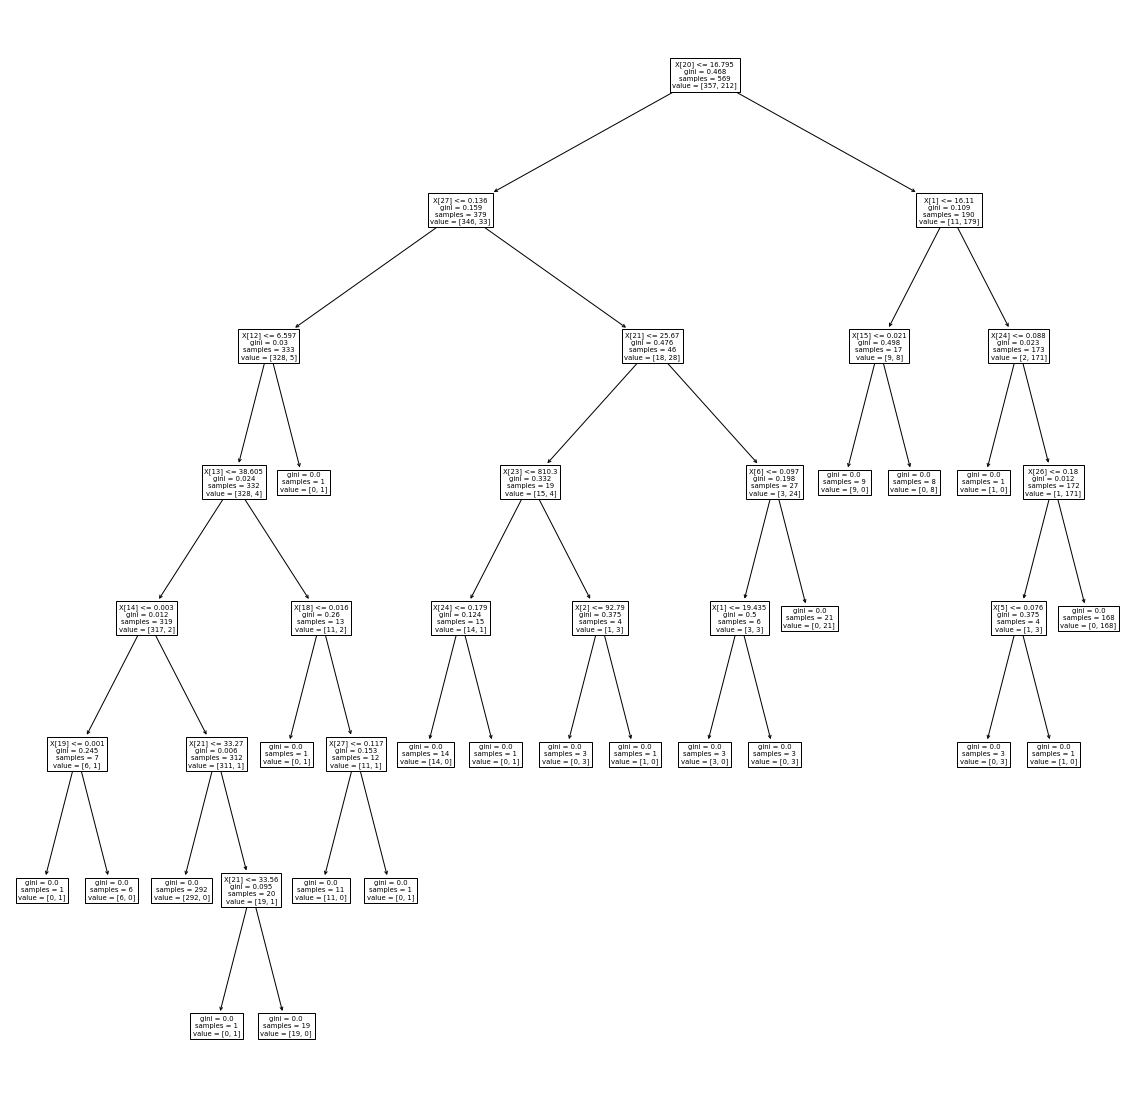

0.9350250626566415


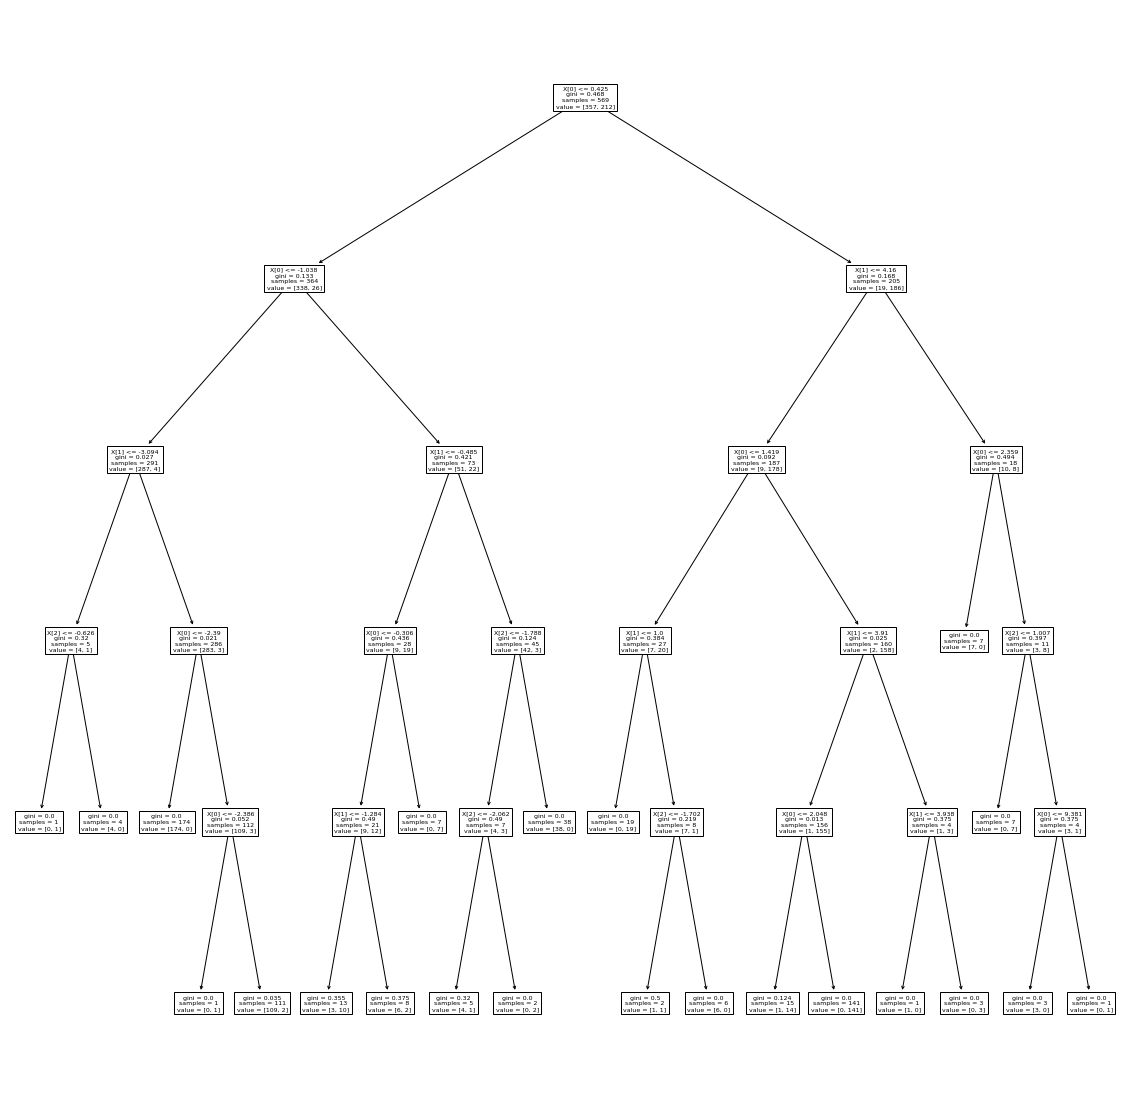

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
print(Kfold_function(data.values,target_bin.values,10,clf))
plt.figure(figsize=(20,20))
plot_tree(clf.fit(data.values,target_bin.values))
plt.show()

clf1 = DecisionTreeClassifier(max_depth=5)
print(Kfold_function(pca_data,target_bin.values,10,clf1))
plt.figure(figsize=(20,20))
plot_tree(clf1.fit(pca_data,target_bin.values))
plt.show()

<font size=5 color=#009999> <i>3.3. Neural networks </i> </font> <br>

We will now use a neural network classifier (perceptron). The network that we will create is a multilayer perceptron (MLP). In your K-fold procedure, it will be trained on the training set and the performances will be assessed on the validation set.

In order to avoid a too large time complexity, you can work excmusively with the variables selected in Point 2. Be careful, don’t forget to standardize your data beforehand. To do so, you only have to remove the mean of each variable and to divide it by its standard deviation:
$$ x'_i = \frac{x_i - \mu_i}{\sigma_i }~~~~~ i = 1...p$$
The <samp>sklearn.preprocessing.StandardScaler</samp> function performs this operation. 

<ol>
    <li> **Creation**: create a <samp>MLPClassifier</samp> object (<samp>sklearn.neural_network</samp> module). You
should give values to some arguments such as activation (choose activation function), max_iter (give a number large enough for convergence) and hidden_layer_sizes (defines the topology of neurons in the network layer by layer).
    <li> **Training**: <samp>fit/fit_transform</samp> functions of the classifier.
    <li> **Validation**: <samp>predict</samp> and <samp>score</samp> functions of the classifier.
 </ol>

Observe the influence of the number of neurons used in the hidden layer of the mlp on the performances, what causes this phenomenon? Why is the logistic function appropriate for a classification problem?

In [36]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

MLP = MLPClassifier(random_state=1, max_iter=300)

print(Kfold_function(data.values,target_bin.values,10,MLP))


MLP = MLPClassifier(random_state=1, max_iter=300)
print(Kfold_function(pca_data,target_bin.values,10,MLP))

0.93671679197995
0.9508458646616542


<font size=5 color=#009999> <i>3.4. SVM </i> </font> <br>

We will now use a support vector machines (SVM) classifier. The idea behind kernel methods is to project the data in another space in which they can be separated more easily. In the case of SVM, the objective is to project the data into a larger space where we can then determine which observations are in fact on the boundary between the two classes. These data points are called the support vectors. The discriminating plane is then defined as the one which is halfway from these points. One only has to classify each observation according to its position with respect to this plane.

<ol>
    <li> **Creation**: create a <samp>SVC</samp> (i.e. Support Vector Classifier) object (<samp>sklearn.svm</samp> module).You should give values to some arguments such as kernel, degree and gamma (set the last to ’scale’ to avoid python warnings).
    <li> **Training**: <samp>fit/fit_transform</samp> functions of the classifier.
    <li> **Validation**: <samp>predict</samp> and <samp>score</samp> functions of the classifier.
 </ol>
Why should we only keep the sign of the predictions? Observe the influence of the kernel choice on the performances.
 

In [37]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
print(Kfold_function(data.values,target_bin.values,10,svc))

print(Kfold_function(pca_data,target_bin.values,10,svc))

0.6276629072681705
0.9297305764411027


<font size=5 color=#009999> <b>4. Comparison </b> </font> <br> <br>

Based on the classification performances on our data and the theoretical advantages and disadvantages of each of the classifiers built in this exercise session, which one do you consider to be the most relevant for our task? <br>

For your information, the best performance achieved in the literature on this dataset is 97.5% correct classification using a K-fold with K = 10 and only keeping 3 of the variables: Largest Area, Largest Smoothness and Mean Texture. The first year it was used, this classifier correctly diagnosed 100% of 176 new observed patients.